In [7]:
import itertools
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import numpy_groupies as npg
import pandas as pd
import scipy.stats as stats
import scipy.special as ss
import sortedcontainers as sc
import os
import tqdm
import pickle

Trying to identify whether these 100 ll jumps are real, or some type of bug

### Load libraries

In [8]:
from statsmodels.discrete.discrete_model import NegativeBinomial as statsNB

In [9]:
os.environ["CAPY_REF_FA"] = "/home/opriebe/data/ref/hg19/Homo_sapiens_assembly19.fasta"
import hapaseg.coverage_MCMC as mcmc_cov
import hapaseg.NB_coverage_MCMC as nb_cov
from capy import mut, seq

Cannot find path to gnomAD index; gnomAD functionality disabled.


In [10]:
import hapaseg.coverage_DP as dp_cov
import hapaseg.a_cov_DP as dp_a_cov

In [11]:
colors = mpl.cm.get_cmap("tab20").colors

In [12]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 30

In [13]:
multidraw_df = pd.read_pickle('exome_results/acdp_df.pickle')

In [14]:
mcmc_data = np.load('exome_results/coverage_mcmc_clusters/cov_mcmc_collected_data.npz')
beta = mcmc_data['beta']

In [15]:
allelic_segs = pd.read_pickle("exome/6_C1D1_META.allelic_segs.auto_ref_correct.overdispersion92.no_phase_correct.pickle")
chrbdy = allelic_segs.dropna().loc[:, ["start", "end"]]
chr_ends = chrbdy.loc[chrbdy["start"] != 0, "end"].cumsum()

alpha=50 multidraw

In [146]:
import importlib
importlib.reload(dp_a_cov)

<module 'hapaseg.a_cov_DP' from '/home/opriebe/dev/HapASeg/hapaseg/a_cov_DP.py'>

In [135]:
a_cov_dp = dp_a_cov.Run_Cov_DP(multidraw_df.copy(), beta, coverage_prior=True, seed_all_clusters=True)

In [136]:
a_cov_dp.run(1)

n unassigned: 0
n_it: 0 nan


/home/opriebe/dev/HapASeg/hapaseg/a_cov_DP.py:361: RuntimeWarning: Mean of empty slice.
  if not all_assigned and (self.cluster_assignments[white_segments] > -1).all():


n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n_it: 1000 245.46569149875714
n unassigned: 0
n unassigned: 0
n unassigned: 0
splitting cluster 354
splitting cluster 847
splitting cluster 569
n unassigned: 0
n_it: 2000 290.5194715725771
splitting cluster 1472
splitting cluster 1584
splitting cluster 1587
n unassigned: 0
splitting cluster 1583
splitting cluster 1588
splitting cluster 1590
splitting cluster 1591
splitting cluster 1592
splitting cluster 1498
n unassigned: 0
splitting cluster 1593
splitting cluster 1595
splitting cluster 1596
splitting cluster 1597
splitting cluster 1598
splitting cluster 1599
n unassigned: 0
splitting cluster 1600
splitting cluster 1100
splitting cluster 1601
splitting cluster 1603
splitting cluster 1604
splitting cluster 1605
n unassigned: 0
n_it: 3000 64.8736439197469
splitting cluster 1606
splitting cluster 1607
splitting cluster 1608
splitting cluster 1609
splitting cluster 1610
splitting cluster 1611
splitting cluster 1498
n unassigne

([array([1589, 1589, 1589, ...,   -1,   -1,   -1])],
 SortedDict({37: 6928, 79: 3, 286: 435, 366: 34986, 464: 5338, 645: 33452, 772: 865, 1018: 3714, 1100: 3222, 1240: 2802, 1498: 3524, 1585: 11950, 1586: 2153, 1589: 42673, 1653: 3244}))

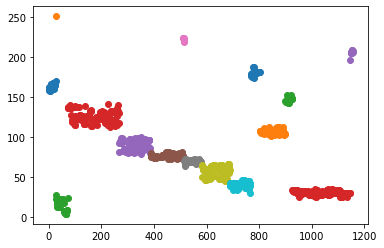

In [137]:
counter=0
for c in a_cov_dp.cluster_dict:
    vals = [np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]
    plt.scatter(np.r_[counter:counter+len(vals)], vals)
    counter+= len(vals)

Text(0.5, 0, 'iteration')

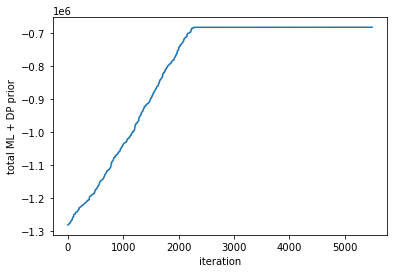

In [138]:
plt.plot(np.r_[:len(a_cov_dp.DP_total_history)], np.array(a_cov_dp.ML_total_history) + np.array(a_cov_dp.DP_total_history))
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

Text(0.5, 0, 'iteration')

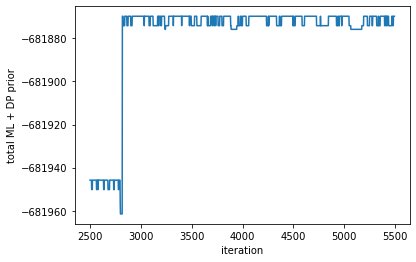

In [141]:
plt.plot(np.r_[2500:len(a_cov_dp.DP_total_history)], np.array(a_cov_dp.ML_total_history)[2500:] + np.array(a_cov_dp.DP_total_history)[2500:])
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

Text(0.5, 0, 'iteration')

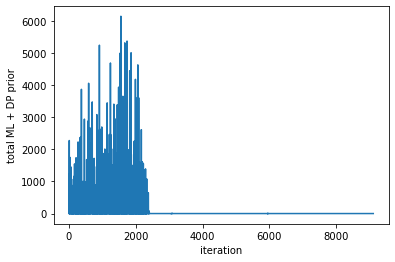

In [88]:
plt.plot(np.r_[:len(ml_arr)], ml_arr)
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

Text(0.5, 0, 'iteration')

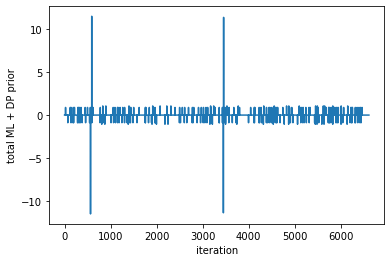

In [89]:
plt.plot(np.r_[:len(ml_arr[2500:])], ml_arr[2500:])
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 8.100e+01, 4.025e+03,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-11.40565895,  -9.12452716,  -6.84339537,  -4.56226358,
         -2.28113179,   0.        ,   2.28113179,   4.56226358,
          6.84339537,   9.12452716,  11.40565895]),
 <BarContainer object of 10 artists>)

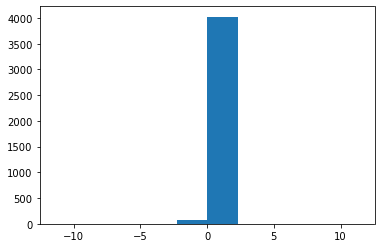

In [82]:
plt.hist(np.diff(np.array(a_cov_dp.ML_total_history)[5000:] + np.array(a_cov_dp.DP_total_history)[5000:]))

Text(0.5, 0, 'iteration')

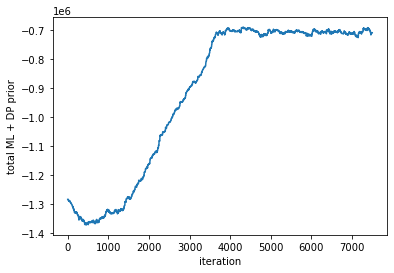

In [67]:
plt.plot(np.r_[:len(a_cov_dp.DP_total_history)], np.array(a_cov_dp.ML_total_history) + np.array(a_cov_dp.DP_total_history))
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

Text(0.5, 0, 'iteration')

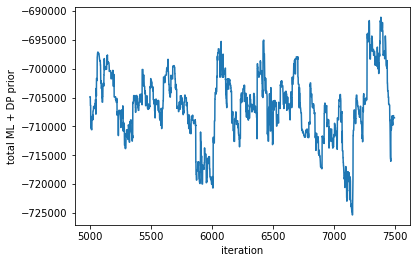

In [68]:
plt.plot(np.r_[5000:len(a_cov_dp.DP_total_history)], np.array(a_cov_dp.ML_total_history)[5000:] + np.array(a_cov_dp.DP_total_history)[5000:])
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

In [69]:
jmp_arr = np.array(a_cov_dp.tmp_ml_jump_history)
ml_arr = np.array(a_cov_dp.ML_total_history) + np.array(a_cov_dp.DP_total_history)

In [70]:
len(jmp_arr)

7499

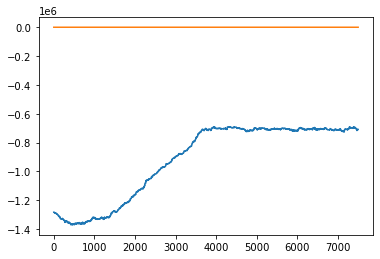

In [71]:
plt.plot(np.r_[:len(a_cov_dp.DP_total_history)], ml_arr)
plt.plot(np.r_[:len(a_cov_dp.DP_total_history)], jmp_arr)

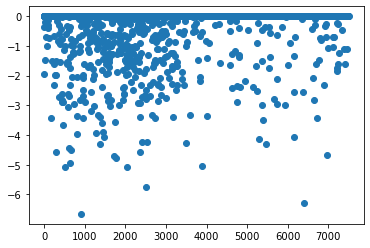

In [72]:
plt.scatter(np.r_[:len(jmp_arr)],jmp_arr)

In [74]:
np.exp(-6)

0.0024787521766663585

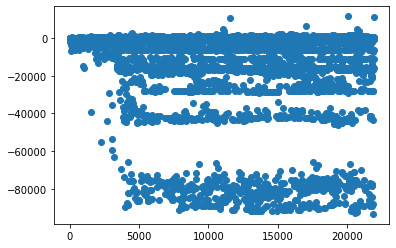

In [50]:
plt.scatter(np.r_[:len(jmp_arr)],jmp_arr)

(-10000.0, 0.0)

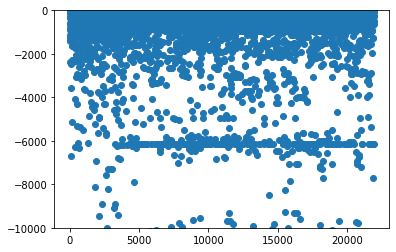

In [59]:
plt.scatter(np.r_[:len(jmp_arr)],jmp_arr)
plt.ylim([-10000,0])

(-1000.0, 0.0)

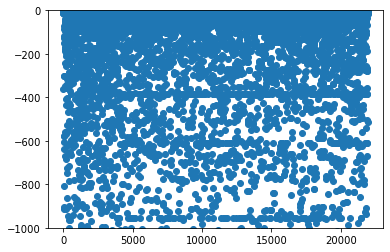

In [60]:
plt.scatter(np.r_[:len(jmp_arr)],jmp_arr)
plt.ylim([-1000,0])

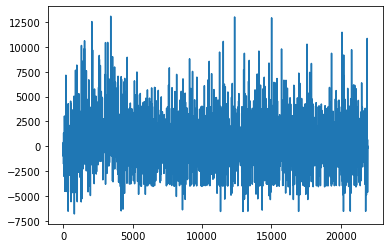

In [56]:
plt.plot(np.r_[:len(a_cov_dp.DP_total_history)-1], np.diff(ml_arr))
#plt.plot(np.r_[:len(a_cov_dp.DP_total_history)], jmp_arr)

In [53]:
jmp_arr

array([ -9.65026488,  -8.45648088, -13.08230581, ..., -13.16821599,
        -1.31810092, -18.86694368])

(array([2.250e+02, 2.750e+02, 2.800e+01, 3.000e+00, 1.670e+02, 7.200e+01,
        2.800e+02, 8.340e+02, 1.995e+04, 9.900e+01]),
 array([-93182.6006315 , -82716.43643336, -72250.27223523, -61784.1080371 ,
        -51317.94383896, -40851.77964083, -30385.6154427 , -19919.45124456,
         -9453.28704643,   1012.8771517 ,  11479.04134984]),
 <BarContainer object of 10 artists>)

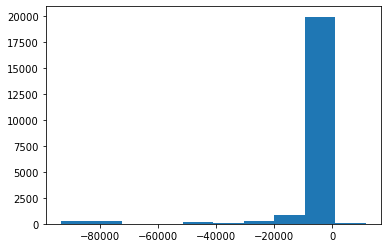

In [57]:
plt.hist(jmp_arr)

In [52]:
np.diff(ml_arr)

array([ -92.99044298, -266.66399109,  -29.9258494 , ..., -551.06035127,
          0.        ,    0.        ])

In [90]:
def _scatter_apply(x, minor, major):
    f = np.zeros(len(x))
    f[x.allele == -1] = minor / (minor + major)
    f[x.allele == 1] = major / (minor + major)
    locs = x.start_g.values + (x.end_g.values - x.start_g.values)/2
    return locs, f
ADP_dict = {}
for ADP, group in a_cov_dp.cov_df.loc[a_cov_dp.cov_df.dp_draw == 0].groupby('allelic_cluster'):
    ADP_dict[ADP] = (group['maj_count'].sum(), group['min_count'].sum())

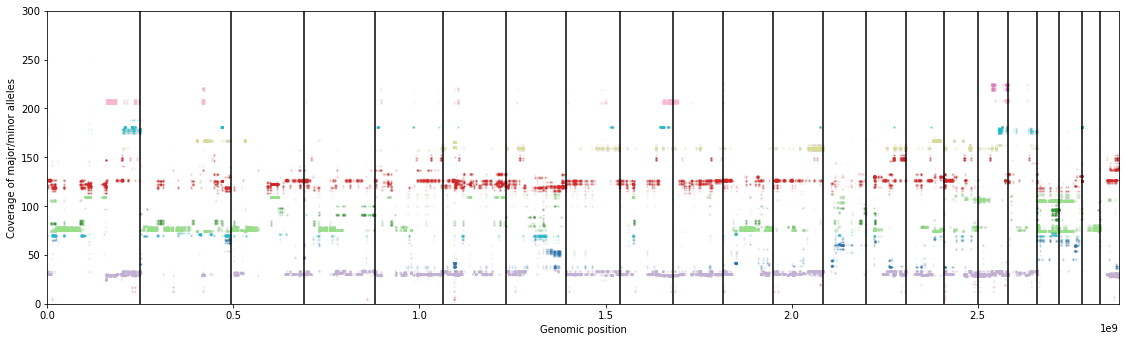

In [142]:
plt.figure(6, figsize = [19.2, 5.39]); plt.clf()
full_df = list(a_cov_dp.cov_df.groupby(['allelic_cluster', 'cov_DP_cluster', 'allele', 'dp_draw']))
for c in a_cov_dp.cluster_dict.keys():
    for s in a_cov_dp.cluster_dict[c]:
        x = full_df[s][1].loc[:,["start_g", "end_g", 'allelic_cluster', 'cov_DP_mu', 'allele', 'maj_count', 'min_count']]
        adp = x['allelic_cluster'].values[0]
        if len(x) > 10:
            major, minor = x['maj_count'].sum(), x['min_count'].sum()
        else:
            major, minor = ADP_dict[adp]
        
        locs, f = _scatter_apply(x, minor,major)
        y = np.exp(x.cov_DP_mu)
        plt.scatter(
            locs,
            f*y,
            color = np.array(colors)[c % len(colors)],
            marker = '.',
            alpha = 0.03,
            s=4
        )

for chrbdy in chr_ends[:-1]:
    plt.axvline(chrbdy, color = 'k')

plt.xlabel("Genomic position")
plt.ylabel("Coverage of major/minor alleles")

plt.xlim((0.0, 2879000000.0));
plt.ylim([0, 300]);

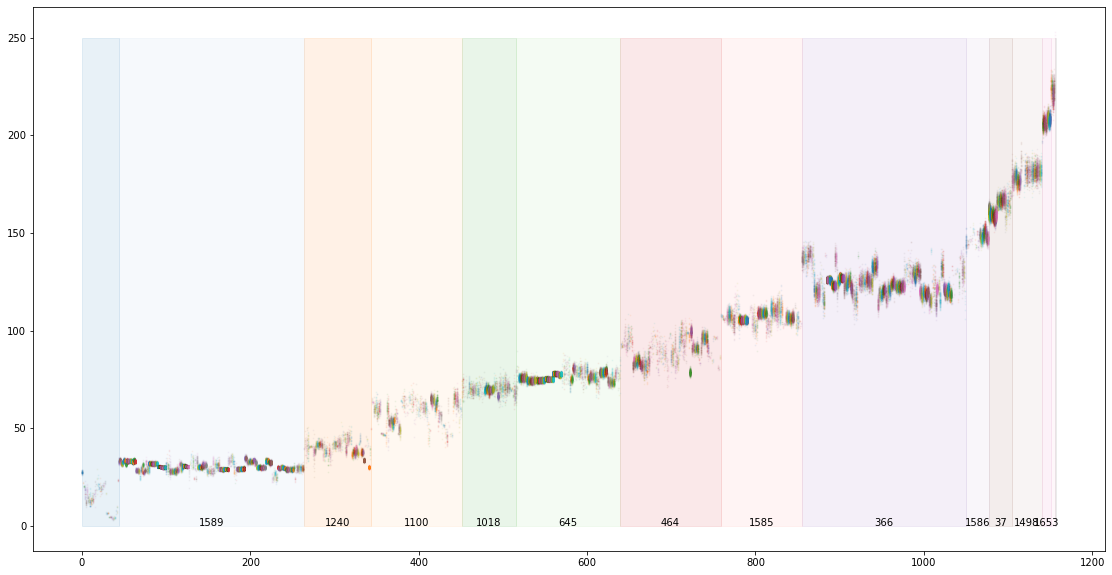

In [144]:
rs = []
for c in a_cov_dp.cluster_dict:
    rs.append((np.array([np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]).mean(),c))
    
f, ax = plt.subplots(1, figsize = [19.2, 10])
counter=0
cc = 0
for c in [t[1] for t in sorted(rs)]:
    c0 = counter
    vals = [np.array(a_cov_dp.segment_r_list[i]) for i in a_cov_dp.cluster_dict[c]]
    
    for arr in vals:
        ax.scatter(np.repeat(counter, len(arr)), arr, marker = '.', alpha=0.05, s=4)
        counter+= 1
    ax.add_patch(mpl.patches.Rectangle((c0,0), counter-c0, 250, fill=True, alpha=0.10, color = colors[cc % len(colors)]))
    if a_cov_dp.cluster_counts[c]> 2000:
        ax.text(c0 + (counter-c0)/2, 0, '{}'.format(c), horizontalalignment='center')
    cc+=1

n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
splitting cluster 642
n unassigned: 0
splitting cluster 20
splitting cluster 354
n unassigned: 0
splitting cluster 12
splitting cluster 12
splitting cluster 12
splitting cluster 12
splitting cluster 12
splitting cluster 12
n unassigned: 0
splitting cluster 12
splitting cluster 12
splitting cluster 12
n unassigned: 0
splitting cluster 12
splitting cluster 12
splitting cluster 12
splitting cluster 12
n unassigned: 0
splitting cluster 12
splitting cluster 12
splitting cluster 12
splitting cluster 12
n unassigned: 0
splitting cluster 284
splitting cluster 12
splitting cluster 12
splitting cluster 12
splitting cluster 12
splitting cluster 12
n unassigned: 0
burnin
splitting cluster 12
splitting cluster 12
splitting cluster 12
splitting cluster 12
n unassigned: 0
splitting cluster 12
splitting cluster 12
splitting cluster 12
splitting cluster 12
splitting cluster 12

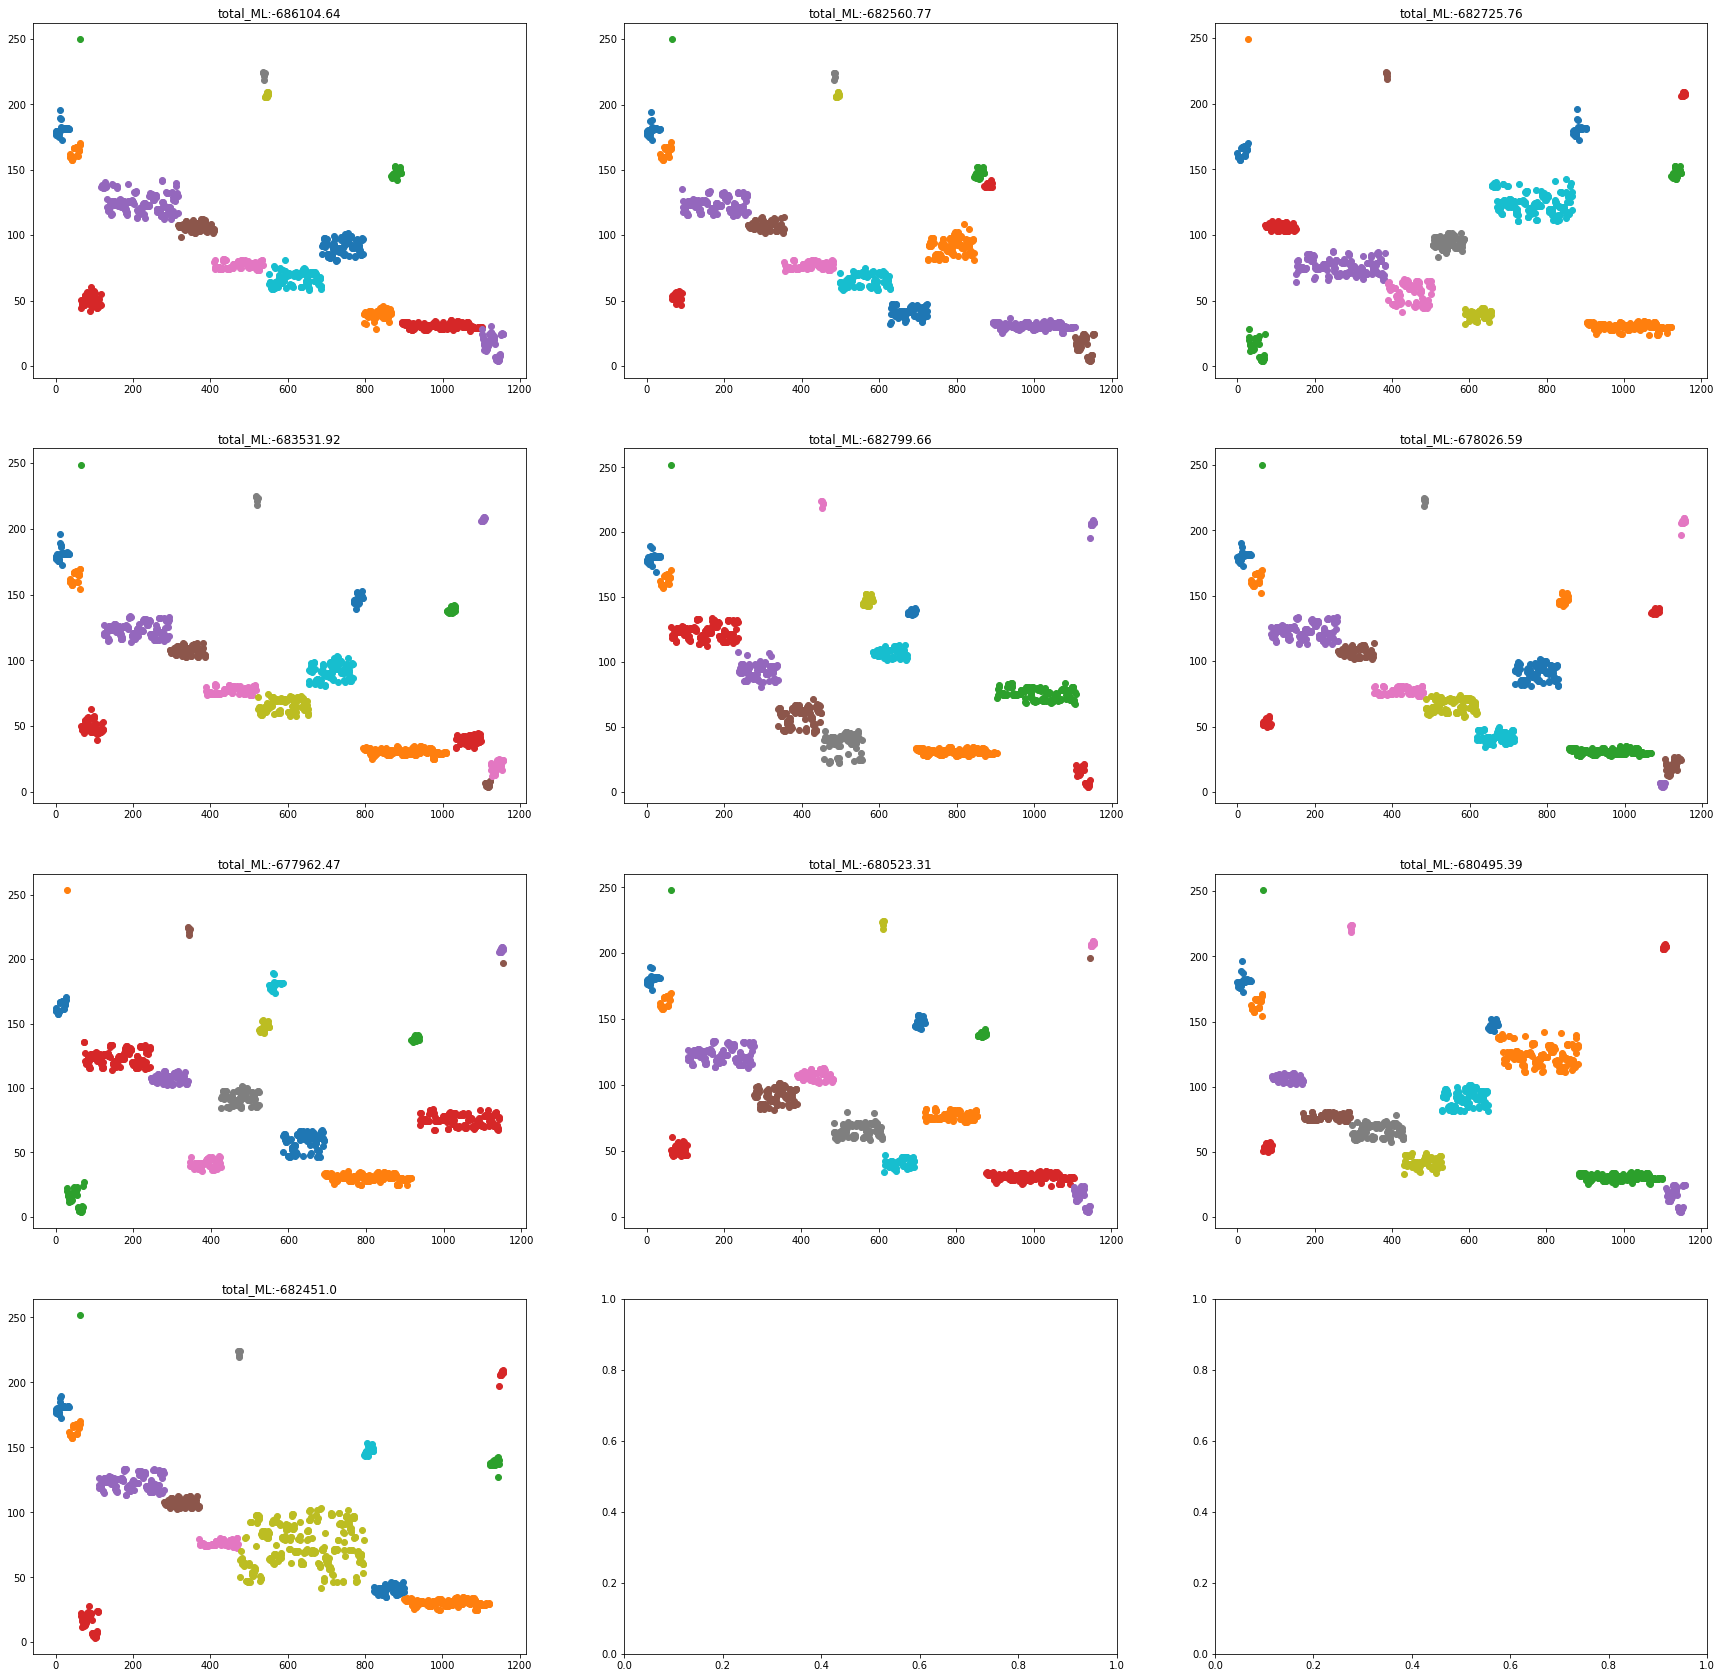

In [147]:
#no coverage prior
f_clust, axs = plt.subplots(4,3, figsize = (30,30))
ax_lst_clust = axs.flatten()
best_a_cov_dp = None
MLs = []
best_total_ML = -1e30
for run in range(10):
    a_cov_dp = dp_a_cov.Run_Cov_DP(multidraw_df.copy(), beta, coverage_prior=True, seed_all_clusters=True)
    a_cov_dp.run(1)
    counter=0
    for c in a_cov_dp.cluster_dict:
        vals = [np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]
        ax_lst_clust[run].scatter(np.r_[counter:counter+len(vals)], vals)
        counter+= len(vals)
    total_ML = a_cov_dp.DP_total_history[-1] + a_cov_dp.ML_total_history[-1]
    MLs.append(total_ML)
    if total_ML > best_total_ML:
        best_total_ML = total_ML
        best_a_cov_dp = a_cov_dp
    ax_lst_clust[run].set_title('total_ML:{}'.format(np.around(total_ML,2)))

In [101]:
np.diff(np.r_[a_cov_dp.MLDP_total_history[-1000:]]).mean()

-0.0030631844745109883

adding back single tuple move but now with corrected DP prior

In [161]:
import importlib
importlib.reload(dp_a_cov)

<module 'hapaseg.a_cov_DP' from '/home/opriebe/dev/HapASeg/hapaseg/a_cov_DP.py'>

In [162]:
a_cov_dp = dp_a_cov.Run_Cov_DP(multidraw_df.copy(), beta, coverage_prior=True, seed_all_clusters=True)

In [163]:
a_cov_dp.run(1)

n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
splitting cluster 15
n unassigned: 0
splitting cluster 370
splitting cluster 286
splitting cluster 354
splitting cluster 15
splitting cluster 1585
splitting cluster 1588
splitting cluster 15
splitting cluster 1589
splitting cluster 15
n unassigned: 0
splitting cluster 845
splitting cluster 15
n unassigned: 0
splitting cluster 1591
splitting cluster 15
splitting cluster 1595
splitting cluster 1597
splitting cluster 15
n unassigned: 0
splitting cluster 15
splitting cluster 1598
splitting cluster 1601
splitting cluster 1602
splitting cluster 15
splitting cluster 15
n unassigned: 0
splitting cluster 1603
splitting cluster 15
splitting cluster 1606
splitting cluster 1608
n unassigned: 0
splitting cluster 1609
splitting cluster 1610
splitting cluster 15
splitting cluster 1611
n unassigned: 0
splitting cluster 15
splitting cluster 1613

([array([1586, 1586, 1586, ...,   -1,   -1,   -1])],
 SortedDict({15: 3528, 37: 6938, 79: 3, 204: 2142, 370: 35138, 569: 11699, 637: 33840, 773: 865, 1020: 4466, 1200: 5197, 1240: 2451, 1472: 2149, 1586: 43123, 1791: 3240, 1804: 515}))

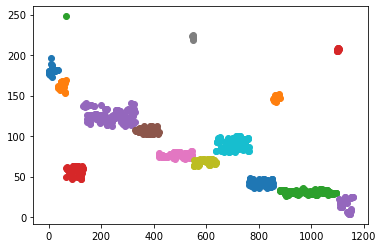

In [164]:
counter=0
for c in a_cov_dp.cluster_dict:
    vals = [np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]
    plt.scatter(np.r_[counter:counter+len(vals)], vals)
    counter+= len(vals)

Text(0.5, 0, 'iteration')

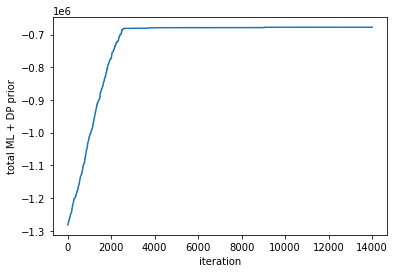

In [165]:
plt.plot(np.r_[:len(a_cov_dp.MLDP_total_history)], a_cov_dp.MLDP_total_history)
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

Text(0.5, 0, 'iteration')

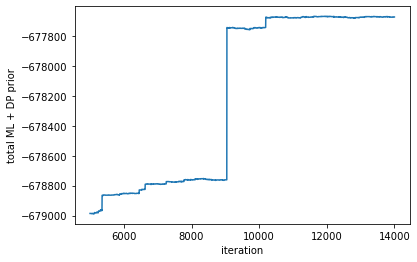

In [166]:
plt.plot(np.r_[5000:len(a_cov_dp.MLDP_total_history)], a_cov_dp.MLDP_total_history[5000:])
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

Text(0.5, 0, 'iteration')

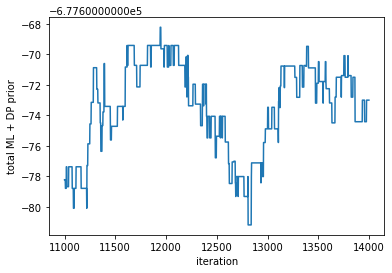

In [169]:
plt.plot(np.r_[11000:len(a_cov_dp.MLDP_total_history)], a_cov_dp.MLDP_total_history[11000:])
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

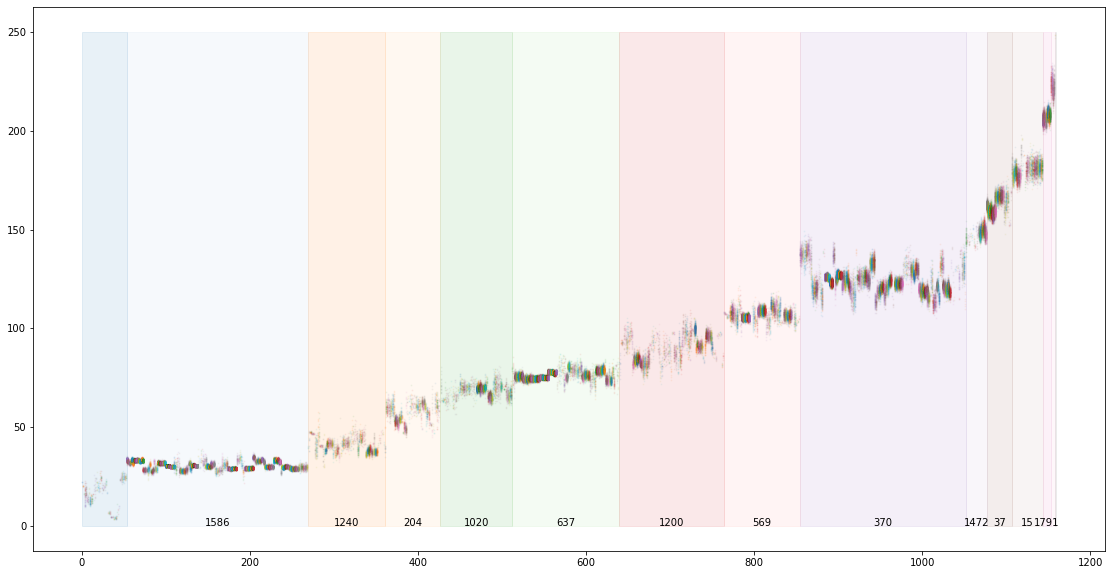

In [170]:
rs = []
for c in a_cov_dp.cluster_dict:
    rs.append((np.array([np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]).mean(),c))
    
f, ax = plt.subplots(1, figsize = [19.2, 10])
counter=0
cc = 0
for c in [t[1] for t in sorted(rs)]:
    c0 = counter
    vals = [np.array(a_cov_dp.segment_r_list[i]) for i in a_cov_dp.cluster_dict[c]]
    
    for arr in vals:
        ax.scatter(np.repeat(counter, len(arr)), arr, marker = '.', alpha=0.05, s=4)
        counter+= 1
    ax.add_patch(mpl.patches.Rectangle((c0,0), counter-c0, 250, fill=True, alpha=0.10, color = colors[cc % len(colors)]))
    if a_cov_dp.cluster_counts[c]> 2000:
        ax.text(c0 + (counter-c0)/2, 0, '{}'.format(c), horizontalalignment='center')
    cc+=1

checking if things are really convereged or if they will eventualy keep increasing

In [172]:
import importlib
importlib.reload(dp_a_cov)

<module 'hapaseg.a_cov_DP' from '/home/opriebe/dev/HapASeg/hapaseg/a_cov_DP.py'>

In [173]:
a_cov_dp = dp_a_cov.Run_Cov_DP(multidraw_df.copy(), beta, coverage_prior=True, seed_all_clusters=True)

In [175]:
a_cov_dp.run(10)

n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
burnin
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n

([array([1585, 1585, 1585, ...,   -1,   -1,   -1]),
  array([1585, 1585, 1585, ...,   -1,   -1,   -1]),
  array([1585, 1585, 1585, ...,   -1,   -1,   -1]),
  array([1585, 1585, 1585, ...,   -1,   -1,   -1]),
  array([1585, 1585, 1585, ...,   -1,   -1,   -1]),
  array([1585, 1585, 1585, ...,   -1,   -1,   -1]),
  array([1585, 1585, 1585, ...,   -1,   -1,   -1]),
  array([1585, 1585, 1585, ...,   -1,   -1,   -1]),
  array([1585, 1585, 1585, ...,   -1,   -1,   -1]),
  array([1585, 1585, 1585, ...,   -1,   -1,   -1])],
 SortedDict({33: 6999, 79: 3, 284: 438, 365: 34766, 569: 12089, 773: 865, 846: 3240, 1474: 2241, 1498: 3524, 1584: 3415, 1585: 43200, 1586: 3704, 1587: 38420, 1604: 2417, 1897: 4}))

Text(0.5, 0, 'iteration')

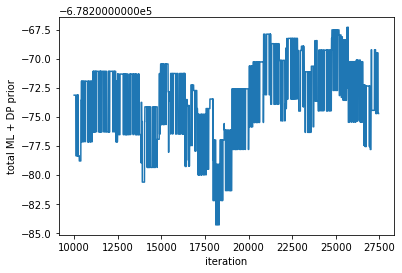

In [180]:
plt.plot(np.r_[10000:len(a_cov_dp.MLDP_total_history)], a_cov_dp.MLDP_total_history[10000:])
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

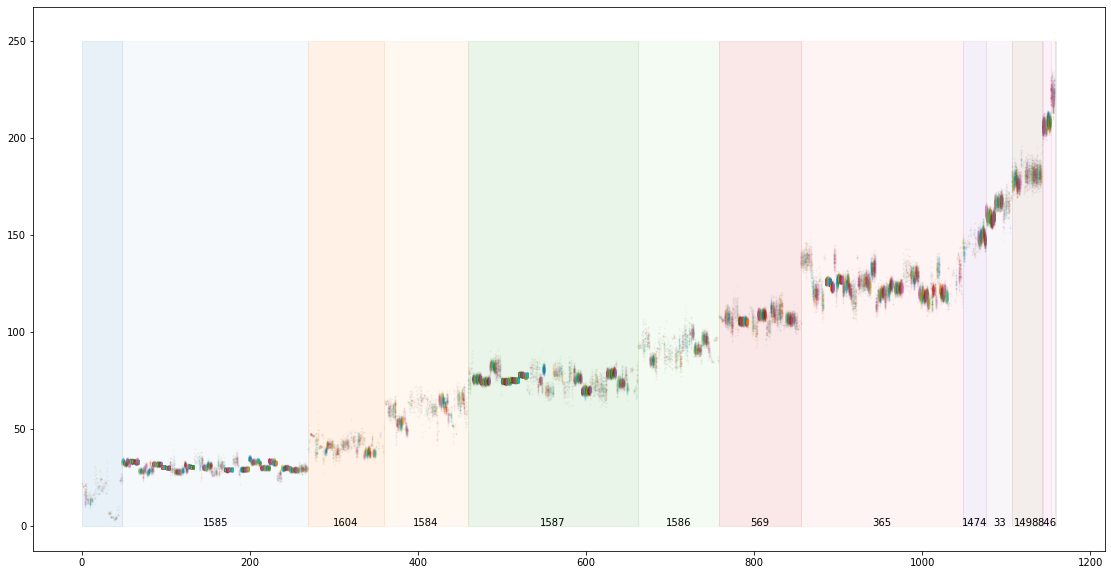

In [181]:
rs = []
for c in a_cov_dp.cluster_dict:
    rs.append((np.array([np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]).mean(),c))
    
f, ax = plt.subplots(1, figsize = [19.2, 10])
counter=0
cc = 0
for c in [t[1] for t in sorted(rs)]:
    c0 = counter
    vals = [np.array(a_cov_dp.segment_r_list[i]) for i in a_cov_dp.cluster_dict[c]]
    
    for arr in vals:
        ax.scatter(np.repeat(counter, len(arr)), arr, marker = '.', alpha=0.05, s=4)
        counter+= 1
    ax.add_patch(mpl.patches.Rectangle((c0,0), counter-c0, 250, fill=True, alpha=0.10, color = colors[cc % len(colors)]))
    if a_cov_dp.cluster_counts[c]> 2000:
        ax.text(c0 + (counter-c0)/2, 0, '{}'.format(c), horizontalalignment='center')
    cc+=1

n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
burnin
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n

KeyboardInterrupt: 

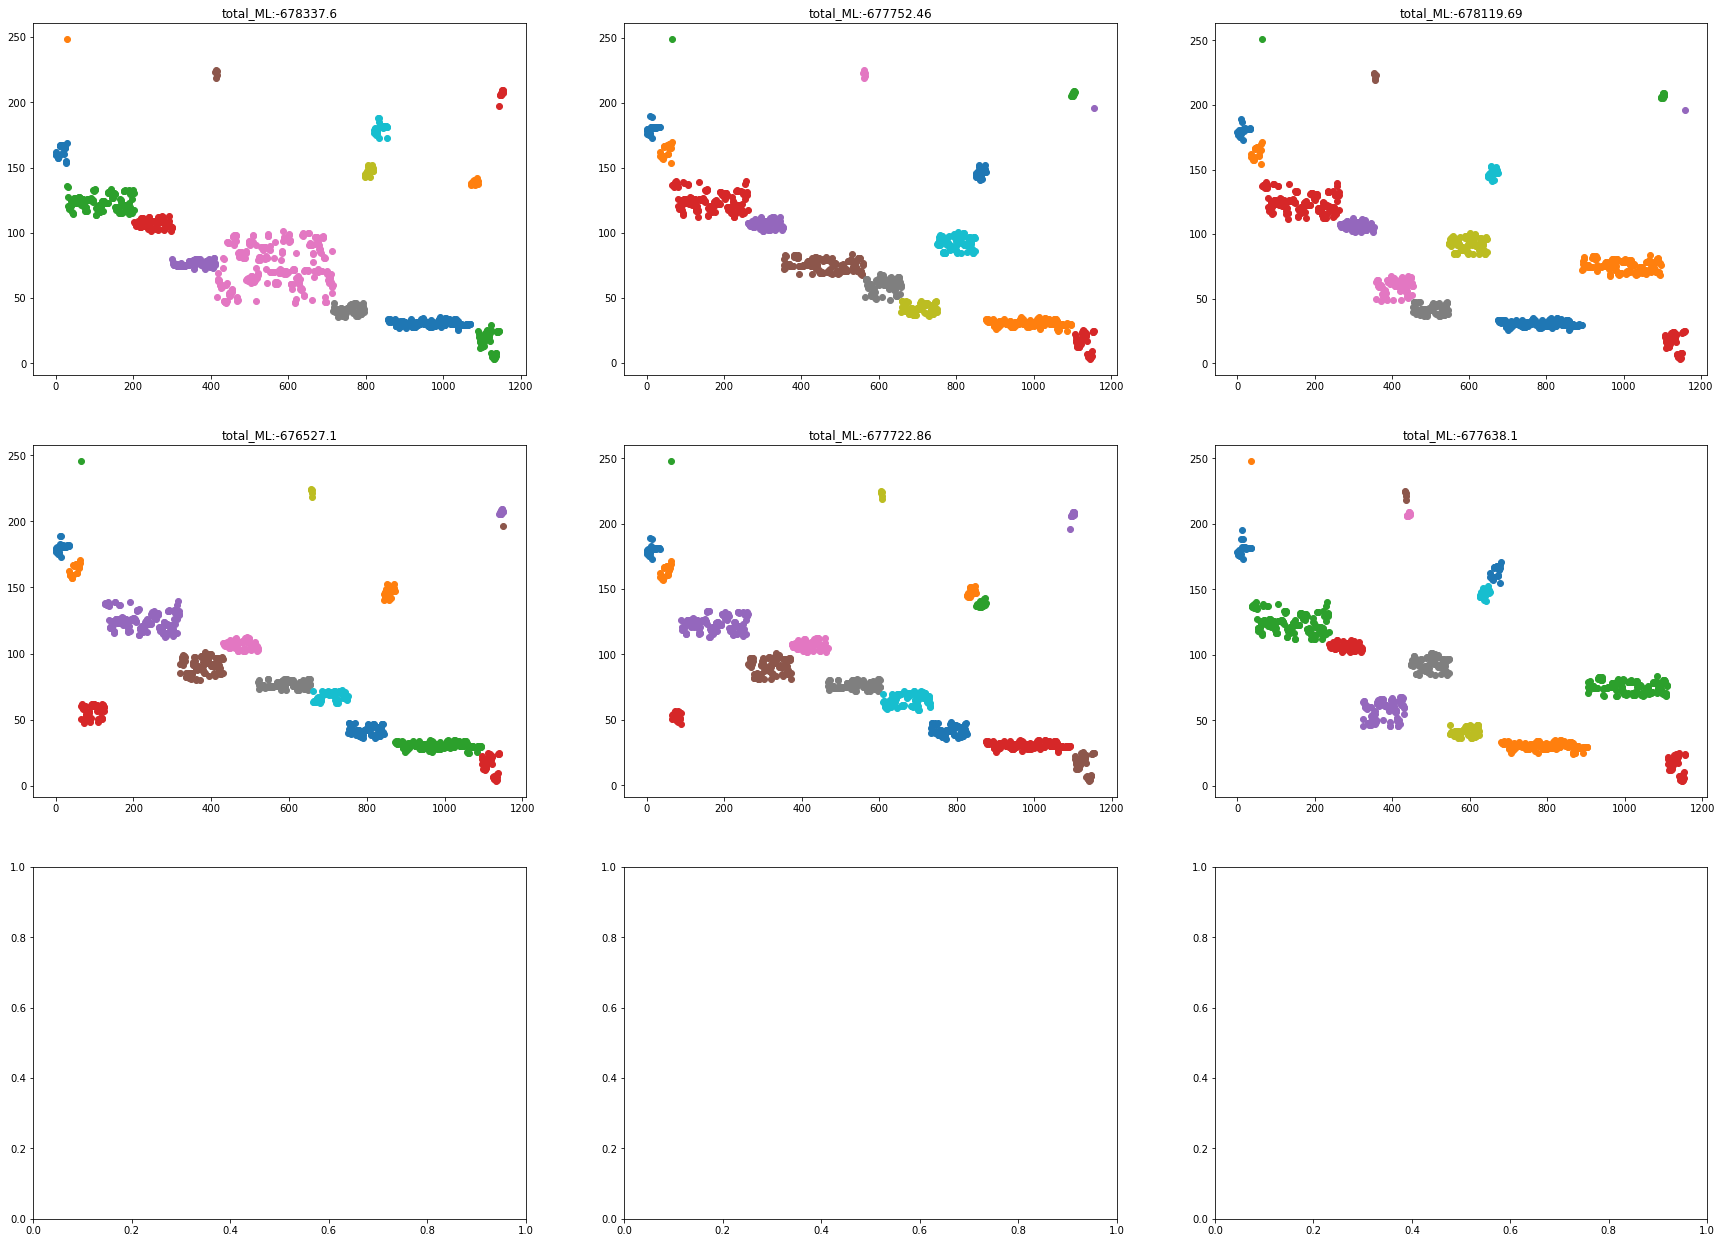

In [184]:
#no coverage prior
f_clust, axs = plt.subplots(3,3, figsize = (30,22))
ax_lst_clust = axs.flatten()
best_a_cov_dp = None
MLs = []
best_total_ML = -1e30
for run in range(9):
    a_cov_dp = dp_a_cov.Run_Cov_DP(multidraw_df.copy(), beta, coverage_prior=True, seed_all_clusters=True)
    a_cov_dp.run(1)
    counter=0
    for c in a_cov_dp.cluster_dict:
        vals = [np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]
        ax_lst_clust[run].scatter(np.r_[counter:counter+len(vals)], vals)
        counter+= len(vals)
    total_ML = a_cov_dp.DP_total_history[-1] + a_cov_dp.ML_total_history[-1]
    MLs.append(total_ML)
    if total_ML > best_total_ML:
        best_total_ML = total_ML
        best_a_cov_dp = a_cov_dp
    ax_lst_clust[run].set_title('total_ML:{}'.format(np.around(total_ML,2)))

In [185]:
multidraw_df

,chr,start,end,covcorr,covraw,start_g,end_g,C_len,C_RT,C_RT_z,C_GC,C_GC_z,allelic_cluster,segment_ID,min_count,maj_count,cov_DP_cluster,cov_DP_mu,cov_DP_sigma,next_g,allele,dp_draw
0,1,984246,984439,72279,110383,984246,984439,194,1.079453,1.880682,0.685567,0.269813,3,32,69.952971,290.720000,3,5.052250,0.000025,1138970,-1,0
1,1,1138970,1139348,185857,281995,1138970,1139348,379,0.909914,0.588950,0.704485,0.291114,0,0,85.692389,406.640000,0,5.359086,0.000464,1147321,-1,0
2,1,1147321,1147518,78285,120449,1147321,1147518,198,0.909914,0.588950,0.707071,0.293980,3,32,84.817977,323.840000,3,5.052250,0.000025,1469305,-1,0
3,1,1469305,1469452,36846,57636,1469305,1469452,148,0.870065,0.250387,0.668919,0.250576,8,87,59.460025,97.520000,7,5.195118,0.000458,1956956,-1,0
4,1,1956956,1957177,69400,108383,1956956,1957177,222,1.002400,1.320789,0.621622,0.193192,3,32,72.576207,241.040000,3,5.052250,0.000025,1959593,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16295,22,50986595,50988380,977681,1456772,2880715315,2880717100,1786,0.954171,0.948001,0.693729,0.279074,0,10,156.400000,703.901770,7,5.130953,0.000345,2880738523,1,9
16296,22,51009803,51009968,59148,93244,2880738523,2880738688,166,1.022385,1.470038,0.602410,0.168626,0,10,36.800000,182.752136,7,5.130953,0.000345,2880770989,1,9
16297,22,51042269,51043492,635932,981591,2880770989,2880772212,1224,1.060847,1.749233,0.744281,0.334114,0,10,71.760000,388.238988,7,5.130953,0.000345,2880792726,1,9
16298,22,51064006,51064109,40385,64456,2880792726,2880792829,104,1.060847,1.749233,0.576923,0.134799,0,10,76.948268,247.480000,7,5.130953,0.000345,2880794313,1,9


In [187]:
np.array(a_cov_dp.segment_V_list).mean()

45.49582886062519

In [188]:
np.median(a_cov_dp.segment_V_list)

5.165359435724477

(array([1.571e+03, 1.600e+01, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([9.22321241e-03, 7.03490735e+02, 1.40697225e+03, 2.11045376e+03,
        2.81393527e+03, 3.51741678e+03, 4.22089829e+03, 4.92437981e+03,
        5.62786132e+03, 6.33134283e+03, 7.03482434e+03]),
 <BarContainer object of 10 artists>)

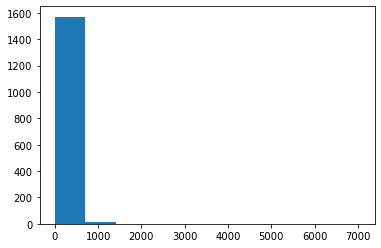

In [189]:
plt.hist(a_cov_dp.segment_V_list)

testing with beta = alpha/2 * 45 since this is the actual mean of the variances

In [219]:
import importlib
importlib.reload(dp_a_cov)

<module 'hapaseg.a_cov_DP' from '/home/opriebe/dev/HapASeg/hapaseg/a_cov_DP.py'>

In [220]:
a_cov_dp = dp_a_cov.Run_Cov_DP(multidraw_df.copy(), beta, coverage_prior=True, seed_all_clusters=True)

In [221]:
%%time
a_cov_dp.run(1)

n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
burnin
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
CPU times: user 10min 25s, sys: 148 ms, total: 10min 25s
Wall time: 10min 25s


([array([1585, 1585, 1585, ...,   -1,   -1,   -1])],
 SortedDict({28: 2452, 33: 6938, 79: 3, 203: 1047, 290: 417, 364: 34057, 641: 34286, 772: 865, 1018: 5479, 1388: 4747, 1476: 2134, 1502: 3524, 1585: 43232, 1588: 902, 1590: 11952, 1686: 3244}))

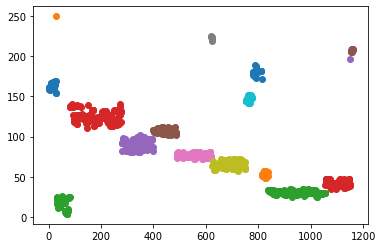

In [194]:
counter=0
for c in a_cov_dp.cluster_dict:
    vals = [np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]
    plt.scatter(np.r_[counter:counter+len(vals)], vals)
    counter+= len(vals)

Text(0.5, 0, 'iteration')

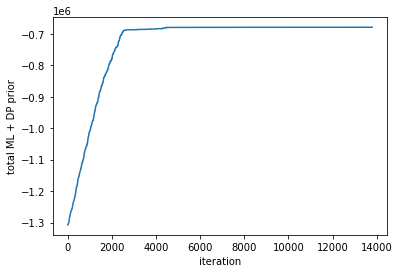

In [195]:
plt.plot(np.r_[:len(a_cov_dp.MLDP_total_history)], a_cov_dp.MLDP_total_history)
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

Text(0.5, 0, 'iteration')

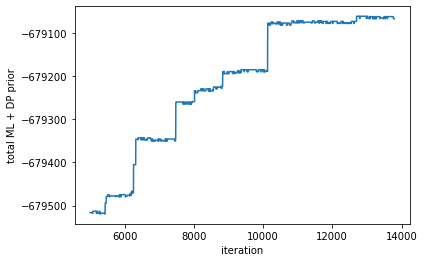

In [196]:
plt.plot(np.r_[5000:len(a_cov_dp.MLDP_total_history)], a_cov_dp.MLDP_total_history[5000:])
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

Text(0.5, 0, 'iteration')

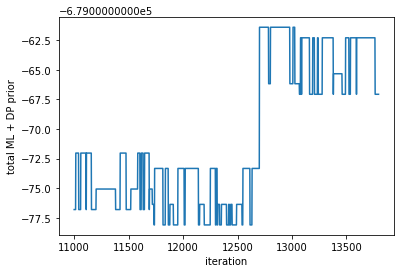

In [197]:
plt.plot(np.r_[11000:len(a_cov_dp.MLDP_total_history)], a_cov_dp.MLDP_total_history[11000:])
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

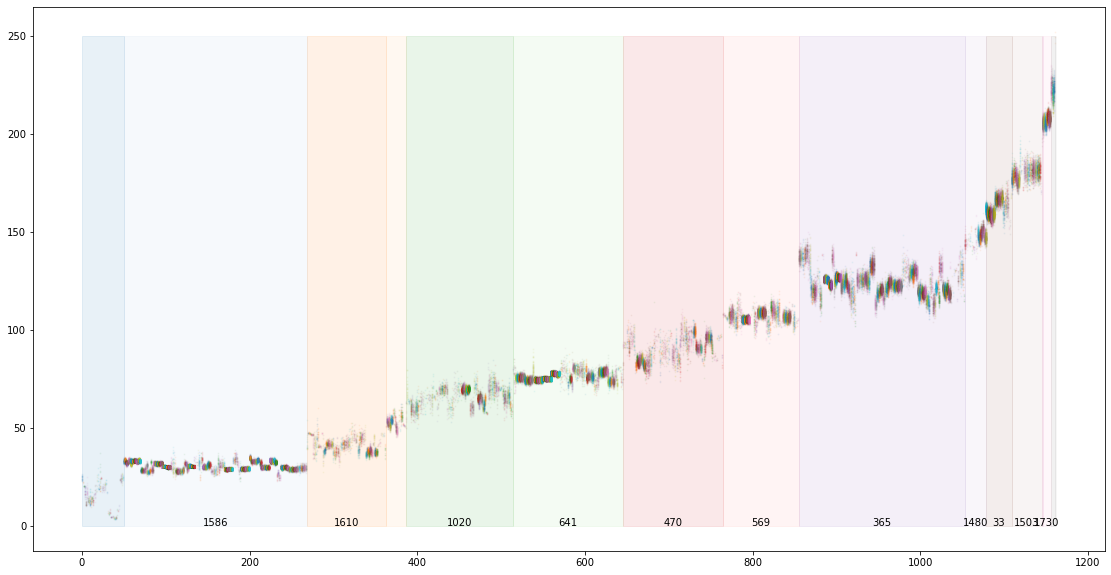

In [198]:
rs = []
for c in a_cov_dp.cluster_dict:
    rs.append((np.array([np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]).mean(),c))
    
f, ax = plt.subplots(1, figsize = [19.2, 10])
counter=0
cc = 0
for c in [t[1] for t in sorted(rs)]:
    c0 = counter
    vals = [np.array(a_cov_dp.segment_r_list[i]) for i in a_cov_dp.cluster_dict[c]]
    
    for arr in vals:
        ax.scatter(np.repeat(counter, len(arr)), arr, marker = '.', alpha=0.05, s=4)
        counter+= 1
    ax.add_patch(mpl.patches.Rectangle((c0,0), counter-c0, 250, fill=True, alpha=0.10, color = colors[cc % len(colors)]))
    if a_cov_dp.cluster_counts[c]> 2000:
        ax.text(c0 + (counter-c0)/2, 0, '{}'.format(c), horizontalalignment='center')
    cc+=1

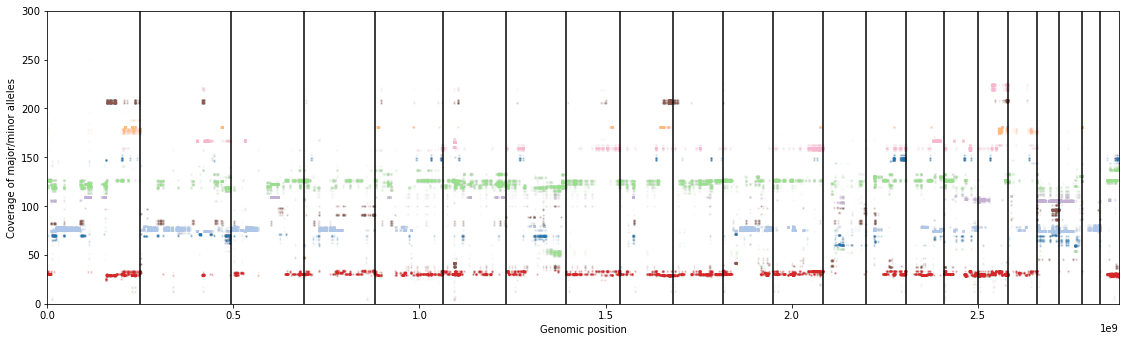

In [199]:
plt.figure(6, figsize = [19.2, 5.39]); plt.clf()
full_df = list(a_cov_dp.cov_df.groupby(['allelic_cluster', 'cov_DP_cluster', 'allele', 'dp_draw']))
for c in a_cov_dp.cluster_dict.keys():
    for s in a_cov_dp.cluster_dict[c]:
        x = full_df[s][1].loc[:,["start_g", "end_g", 'allelic_cluster', 'cov_DP_mu', 'allele', 'maj_count', 'min_count']]
        adp = x['allelic_cluster'].values[0]
        if len(x) > 10:
            major, minor = x['maj_count'].sum(), x['min_count'].sum()
        else:
            major, minor = ADP_dict[adp]
        
        locs, f = _scatter_apply(x, minor,major)
        y = np.exp(x.cov_DP_mu)
        plt.scatter(
            locs,
            f*y,
            color = np.array(colors)[c % len(colors)],
            marker = '.',
            alpha = 0.03,
            s=4
        )

for chrbdy in chr_ends[:-1]:
    plt.axvline(chrbdy, color = 'k')

plt.xlabel("Genomic position")
plt.ylabel("Coverage of major/minor alleles")

plt.xlim((0.0, 2879000000.0));
plt.ylim([0, 300]);

45 vs 30 doesnt seem to make a difference--although the burn in critera still seems a bit shakey. We see here that it settles in a local maxima for a while before it hops up to a new maxima, sometimes one which is 100 ll points higher

testing again whether cold start is feasible

In [222]:
import importlib
importlib.reload(dp_a_cov)

<module 'hapaseg.a_cov_DP' from '/home/opriebe/dev/HapASeg/hapaseg/a_cov_DP.py'>

In [223]:
a_cov_dp = dp_a_cov.Run_Cov_DP(multidraw_df.copy(), beta, coverage_prior=True, seed_all_clusters=False)

In [224]:
%%time
a_cov_dp.run(1)

n unassigned: 1154
n unassigned: 1040
n unassigned: 929
n unassigned: 840
n unassigned: 746
n unassigned: 674
n unassigned: 601
n unassigned: 532
n unassigned: 468
n unassigned: 418
n unassigned: 370
n unassigned: 335
n unassigned: 309
n unassigned: 271
n unassigned: 248
n unassigned: 233
n unassigned: 210
n unassigned: 188
n unassigned: 167
n unassigned: 117
n unassigned: 55
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
burnin
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
CPU times: user 5min 33s, sys: 160 ms, total: 5min 33s
Wall time: 5min 33s


([array([13, 13, 13, ..., -1, -1, -1])],
 SortedDict({1: 1035, 4: 33934, 6: 11983, 8: 2139, 9: 4540, 10: 2452, 13: 43160, 15: 34443, 20: 3524, 21: 990, 23: 3, 24: 865, 25: 5517, 27: 6933, 29: 481, 68: 4, 69: 3240}))

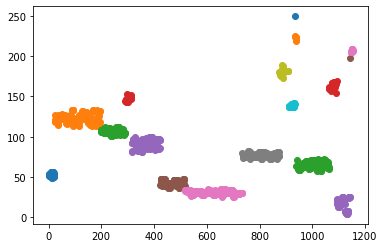

In [225]:
counter=0
for c in a_cov_dp.cluster_dict:
    vals = [np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]
    plt.scatter(np.r_[counter:counter+len(vals)], vals)
    counter+= len(vals)

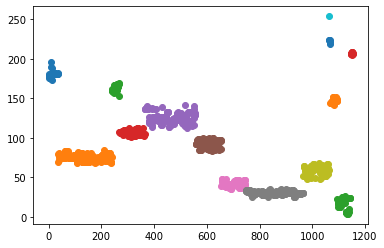

In [218]:
counter=0
for c in a_cov_dp.cluster_dict:
    vals = [np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]
    plt.scatter(np.r_[counter:counter+len(vals)], vals)
    counter+= len(vals)

Text(0.5, 0, 'iteration')

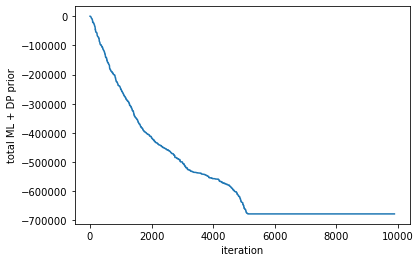

In [207]:
plt.plot(np.r_[:len(a_cov_dp.MLDP_total_history)], a_cov_dp.MLDP_total_history)
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

Text(0.5, 0, 'iteration')

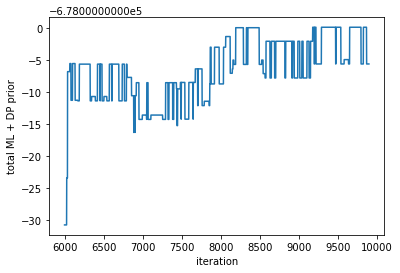

In [209]:
plt.plot(np.r_[6000:len(a_cov_dp.MLDP_total_history)], a_cov_dp.MLDP_total_history[6000:])
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

Text(0.5, 0, 'iteration')

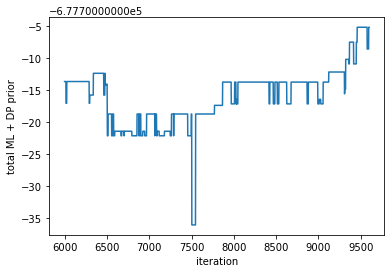

In [217]:
plt.plot(np.r_[6000:len(a_cov_dp.MLDP_total_history)], a_cov_dp.MLDP_total_history[6000:])
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

In [289]:
import importlib
importlib.reload(dp_a_cov)

<module 'hapaseg.a_cov_DP' from '/home/opriebe/dev/HapASeg/hapaseg/a_cov_DP.py'>

In [290]:
a_cov_dp = dp_a_cov.Run_Cov_DP(multidraw_df.copy(), beta, coverage_prior=True, seed_all_clusters=False)

In [291]:
%%time
a_cov_dp.run(1)

n unassigned: 1157
n unassigned: 1036
n unassigned: 932
n unassigned: 841
n unassigned: 758
n unassigned: 672
n unassigned: 618
n unassigned: 551
n unassigned: 491
n unassigned: 438
n unassigned: 398
n unassigned: 357
n unassigned: 308
n unassigned: 274
n unassigned: 242
n unassigned: 219
n unassigned: 198
n unassigned: 179
n unassigned: 158
n unassigned: 83
n unassigned: 18
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
burnin
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
CPU times: user 53.5 s, sys: 24 ms, total: 53.5 s
Wall time: 53.5 s


([array([23, 23, 23, ..., -1, -1, -1])],
 SortedDict({1: 3270, 4: 31968, 7: 6975, 8: 3, 11: 38501, 13: 2145, 16: 2040, 18: 2466, 20: 3515, 23: 43152, 36: 478, 39: 15830, 40: 865, 41: 941, 87: 3244}))

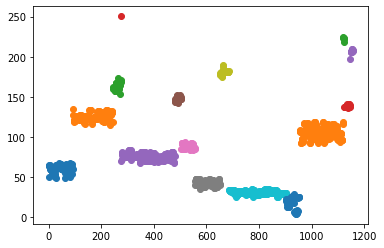

In [292]:
counter=0
for c in a_cov_dp.cluster_dict:
    vals = [np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]
    plt.scatter(np.r_[counter:counter+len(vals)], vals)
    counter+= len(vals)

Text(0.5, 0, 'iteration')

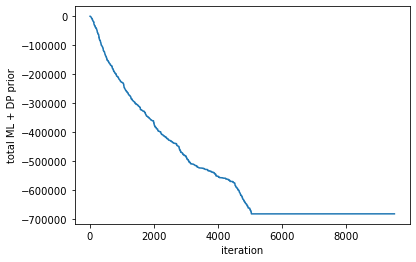

In [293]:
plt.plot(np.r_[:len(a_cov_dp.MLDP_total_history)], a_cov_dp.MLDP_total_history)
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

Text(0.5, 0, 'iteration')

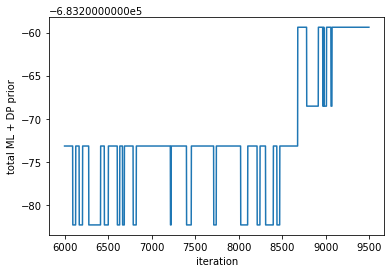

In [294]:
plt.plot(np.r_[6000:len(a_cov_dp.MLDP_total_history)], a_cov_dp.MLDP_total_history[6000:])
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

Text(0.5, 0, 'iteration')

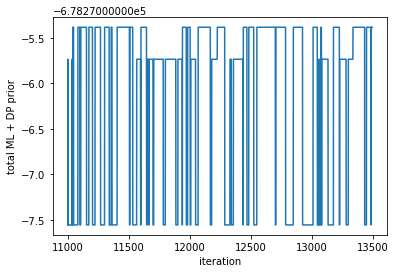

In [283]:
plt.plot(np.r_[11000:len(a_cov_dp.MLDP_total_history)], a_cov_dp.MLDP_total_history[11000:])
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

In [297]:
np.diff(np.array(a_cov_dp.MLDP_total_history)[-3000:-1000]).mean()

0.004587575664388304